# Underfitting vs. Overfitting

This notebook was adapted from the [Scikit-Learn overfitting and underfitting example](http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html).

![](overfit.png)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import sklearn.metrics as mt

We define the "true" relationship between X and y:

$ y = cos(1.5\pi \mathbf{X}) $

In [3]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [4]:
n_samples = 30
domain = np.arange(1, 21)

X1 = np.sort(np.random.rand(n_samples))
y1 = true_fun(X1) + np.random.randn(n_samples) * 0.2

X2 = np.sort(np.random.rand(n_samples))
y2 = true_fun(X2) + np.random.randn(n_samples) * 0.2

In [5]:
X_train = X1.reshape(-1, 1)
y_train = y1.reshape(-1, 1)
X_test = X2.reshape(-1, 1)
y_test = y2.reshape(-1, 1)
X_lin = np.linspace(0, 1, 100).reshape(-1, 1)
y_lin = true_fun(X_lin).reshape(-1, 1)

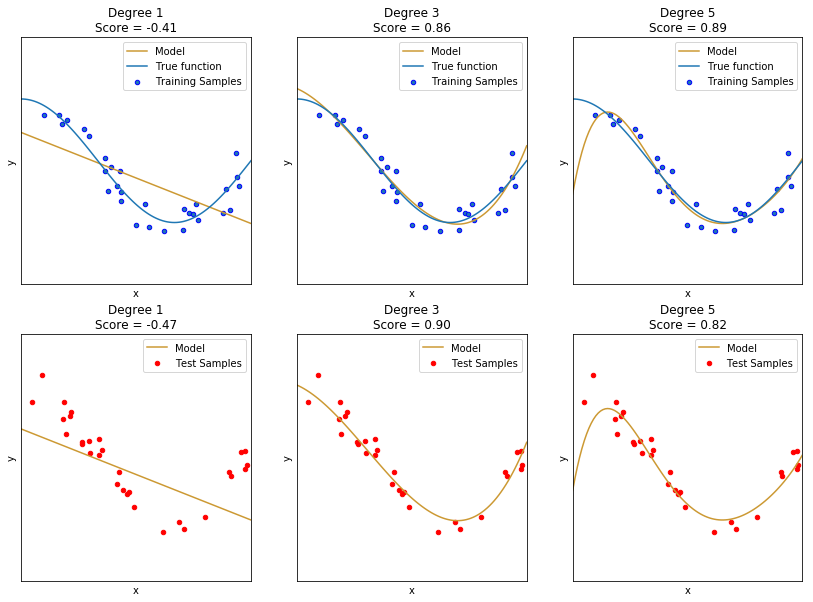

In [6]:
plt.figure(figsize=(14, 10))
scores_tr = []
scores_te  = []
degrees = list(range(1, 21))
plots = [1, 3, 5]
c = 0
for i in list(range(len(degrees))):

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=True)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

    # fit model using training data
    pipeline.fit(X_train, y_train)
    
    # get predictions
    y_hat_train = pipeline.predict(X_train)
    y_hat_lin   = pipeline.predict(X_lin)
    y_hat_test  = pipeline.predict(X_test)
    
    scores_tr.append(mt.explained_variance_score(y_hat_train, y_train))
    scores_te.append(mt.explained_variance_score(y_hat_test, y_test))
    #scores_tr.append(pipeline.score(X_train, y_train))
    #scores_te.append(pipeline.score(X_test, y_test))
    
    if degrees[i] in plots:
        c = c + 1
        ax = plt.subplot(2, len(plots), c)
        plt.setp(ax, xticks=(), yticks=())

        plt.plot(X_lin, y_hat_lin, label="Model", color="#CC9933")
        plt.plot(X_lin, y_lin, label="True function")
        plt.scatter(X_train, y_train, edgecolor='b', s=20, label="Training Samples")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim((0, 1))
        plt.ylim((-2, 2))
        plt.legend(loc="best")
        plt.title("Degree %d\nScore = %.2f" % (degrees[i], scores_tr[i]))

        ax = plt.subplot(2, len(plots), c+3)
        plt.setp(ax, xticks=(), yticks=())
        plt.plot(X_lin, y_hat_lin, label="Model", color="#CC9933")
        plt.scatter(X_test, y_test, color='r', s=20, label="Test Samples")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim((0, 1))
        plt.ylim((-2, 2))
        plt.legend(loc="best")
        plt.title("Degree %d\nScore = %.2f" % (degrees[i], scores_te[i]))

plt.show()

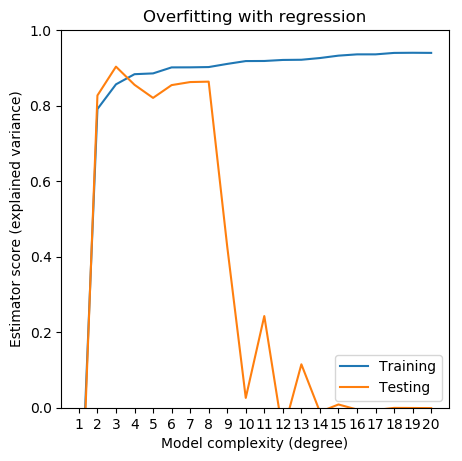

In [8]:
x_plot = degrees
plt.figure(figsize=(5,5), dpi=100)
plt.title("Overfitting with regression")
plt.plot(x_plot, scores_tr, label="Training")
plt.plot(x_plot, scores_te, label="Testing")
plt.xlabel("Model complexity (degree)")
plt.ylabel("Estimator score (explained variance)")
plt.xticks(x_plot)
plt.legend(loc="best")
plt.ylim(0, 1)
plt.show()